In [1]:
!pip install praw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 3.4 MB/s eta 0:00:00


In [ ]:
!pip install matplotlib

In [6]:
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
import praw

user_agent = "Scrapper 1.0 "
reddit = praw.Reddit(
    client_id="WykMz_ZPu75093N0WX6aIg",
    client_secret = "Ve-e0vuU_8uqlphoUzIsNwgEmz9MuQ",
    user_agent= user_agent,
   check_for_async=False
)

In [16]:
headlines = set()
for submission in reddit.subreddit('GPT').hot(limit = None):
  # print(submission.title)
  # # print(submission.id)
  # # print(submission.author)
  # # print(submission.created_utc)
  # # print(submission.score)
  # # print(submission.upvote_ratio)
  # # print(submission.url)
  # break
  headlines.add(submission.title)

print(len(headlines))

535


In [17]:
df = pd.DataFrame(headlines)
df.head()


,0
0,Let GPT solve mypy issues for you!
1,Apple watch ultra is not an official product !
2,AI Voice assistant
3,Does GPT3.5 hallucinate and make up stuff more...
4,Convo-lang - A conversational prompting and pr...


In [18]:
df.to_csv('headlines.csv', header=False, encoding='utf-8', index=False)

In [19]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [23]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for line in headlines:
  pol_score = sia.polarity_scores(line) #->dict
  pol_score['headline'] = line
  results.append(pol_score)
pprint(results[:3], width=100)

[{'compound': 0.2714,
  'headline': 'Let GPT solve mypy issues for you!',
  'neg': 0.0,
  'neu': 0.741,
  'pos': 0.259},
 {'compound': 0.0,
  'headline': 'Apple watch ultra is not an official product !',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': 0.0, 'headline': 'AI Voice assistant', 'neg': 0.0, 'neu': 1.0, 'pos': 0.0}]


In [24]:
df = pd.DataFrame.from_records(results)
df.head()

,neg,neu,pos,compound,headline
0,0.0,0.741,0.259,0.2714,Let GPT solve mypy issues for you!
1,0.0,1.000,0.000,0.0000,Apple watch ultra is not an official product !
2,0.0,1.000,0.000,0.0000,AI Voice assistant
3,0.0,1.000,0.000,0.0000,Does GPT3.5 hallucinate and make up stuff more...
4,0.0,1.000,0.000,0.0000,Convo-lang - A conversational prompting and pr...


In [25]:
df['labels'] = 0
df.loc[df['compound'] > 0.2, 'label'] =1
df.loc[df['compound']< -0.2, 'label'] = -1
df.head()

,neg,neu,pos,compound,headline,labels,label
0,0.0,0.741,0.259,0.2714,Let GPT solve mypy issues for you!,0,1.0
1,0.0,1.000,0.000,0.0000,Apple watch ultra is not an official product !,0,NaN
2,0.0,1.000,0.000,0.0000,AI Voice assistant,0,NaN
3,0.0,1.000,0.000,0.0000,Does GPT3.5 hallucinate and make up stuff more...,0,NaN
4,0.0,1.000,0.000,0.0000,Convo-lang - A conversational prompting and pr...,0,NaN


In [26]:
df2 = df[['headline', 'label']]

In [27]:
df2.to_csv('reddit_headlines_labels.csv', encoding='utf-8', index=False)

In [28]:
df.label.value_counts()

 1.0    159
-1.0     45
Name: label, dtype: int64

In [29]:
df.label.value_counts(normalize=True)*100

 1.0    77.941176
-1.0    22.058824
Name: label, dtype: float64

In [30]:
print("Positive headlines:\n")
pprint(list(df[df['label']==1].headline)[:5], width=200)
print("Negative headlines:\n")
pprint(list(df[df['label']==-1].headline)[:5], width=200)


Positive headlines:

['Let GPT solve mypy issues for you!', 'Good morning everyone Found a Cool GPT Tool', 'Prompt Engineering: Easy Wins in Prompt Crafting', 'Top 5 Best AI Content Detectors', 'Guys, I need your help.']
Negative headlines:

['European VCs and tech firms sign open letter warning against over-regulation of AI in draft EU laws',
 'Tell me, now that GPTzero has been made. How illegal is it to gather up a lot of folks and just over run the servers to constantly keep it down?',
 'How Tech Giants Turned Ukraine Into an AI War Lab - TIME',
 'Privacy in the Age of AI: The Dangers of Unverified ChatGPT Plugins - GPT Weekly Rundown',
 'GPT Outages: A Major Disruption for Those Who Rely on the Environment']


<ipython-input-32-820335174544>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Negaitve', 'Neural', 'Positive'])


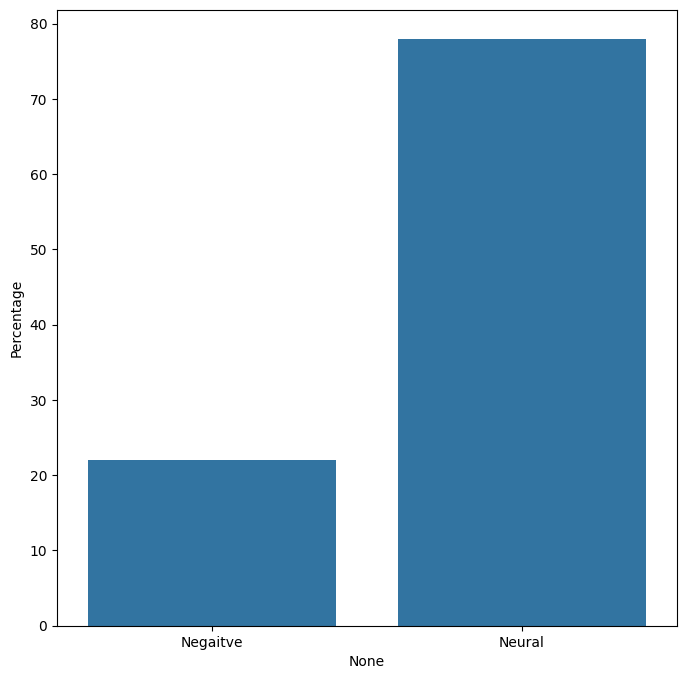

In [32]:
fig, ax = plt.subplots(figsize=(8,8))
counts= df.label.value_counts(normalize=True)*100

sns.barplot(x= counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negaitve', 'Neural', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()